In [1]:
%matplotlib inline

In [21]:
# stdlib imports
import json
import warnings

# third party imports
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker

from IPython.display import Image
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

import numpy as np
import pandas as pd
from scipy import stats

# Anatomy of a Matplotlib Plot

You will notice in the figure below various annotated elements. We can programmatically control all of these using matplotlib functions.

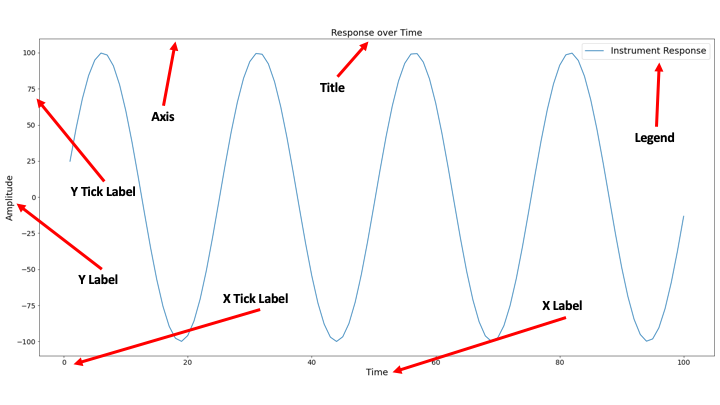

In [3]:
Image(filename='sample_figure_annotated.png')

## Code

The code below demonstrates how the plot above was made (minus the annotation, which was done manually).

Note that we're saving the figure to the PDF (vector) format. Most of the time, you should be fairly safe in assuming that you can save to the following formats:
 - png Portable Network Graphics, a small and loss-less raster format
 - pdf Portable Document Format, a vector format
 - ps Postscript, the original vector format, works well with Illustrator and the like
 - eps Encapsulated Postscript, an extension of postscript 
 - svg Scalable Vector Graphics XML-based vector format.
 
Note that vector formats are scalable without losing resolution, whereas raster formats are composed of pixels that you will see clearly as you zoom in on the figure. PNG is small and well suited for web pages, for example.

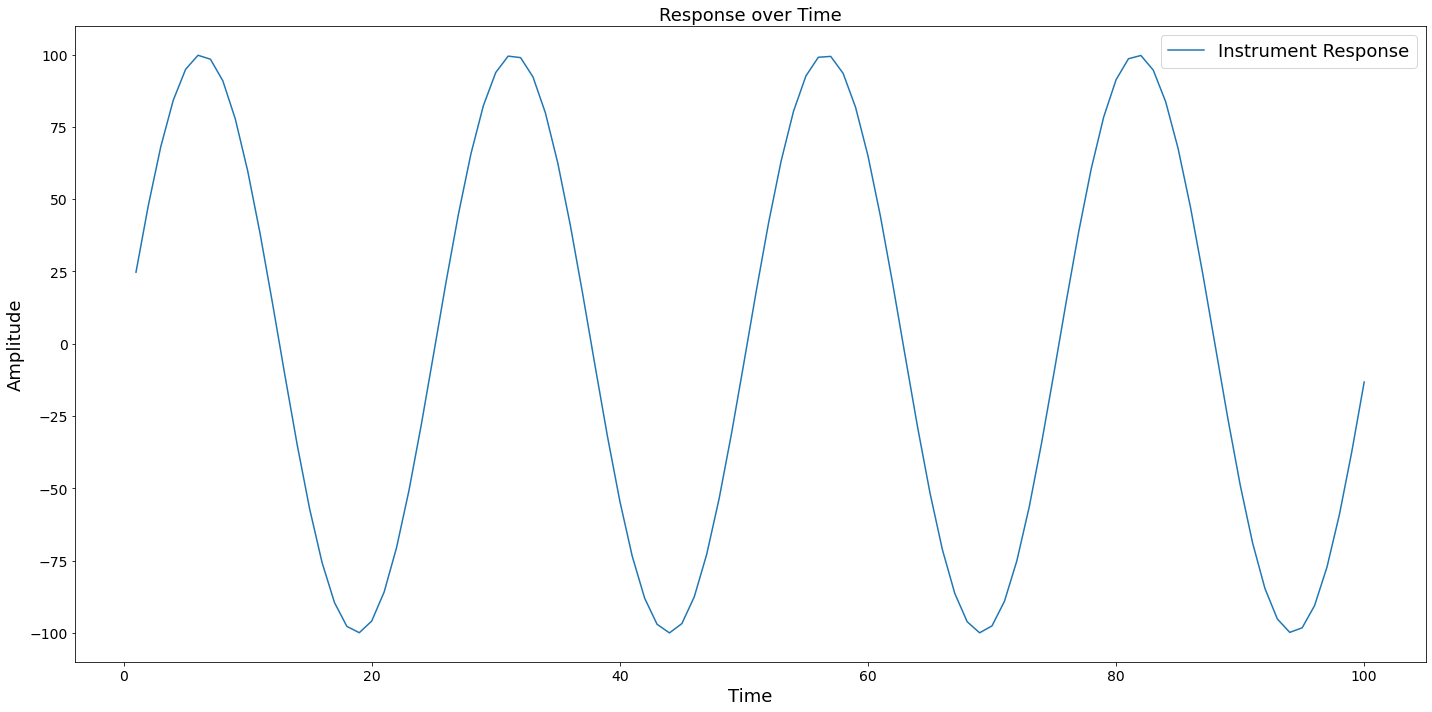

In [4]:
f = plt.figure(figsize=(20,10))
x = np.arange(1,101)
y = np.sin(x/4) * 100
line2d = plt.plot(x,y)
xlabel = plt.xlabel('Time', fontsize=18);
ylabel = plt.ylabel('Amplitude', fontsize=18);
title = plt.title('Response over Time', fontsize=18);

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(['Instrument Response'], fontsize=18);
plt.tight_layout()

# Note here that we can save the figure to PDF
plt.savefig('sample_figure.pdf', dpi=300);

# Colors

As matplotlib documentation says:

`You can specify colors in many weird and wonderful ways.`

Let's make one plot showing the different ways to specify color

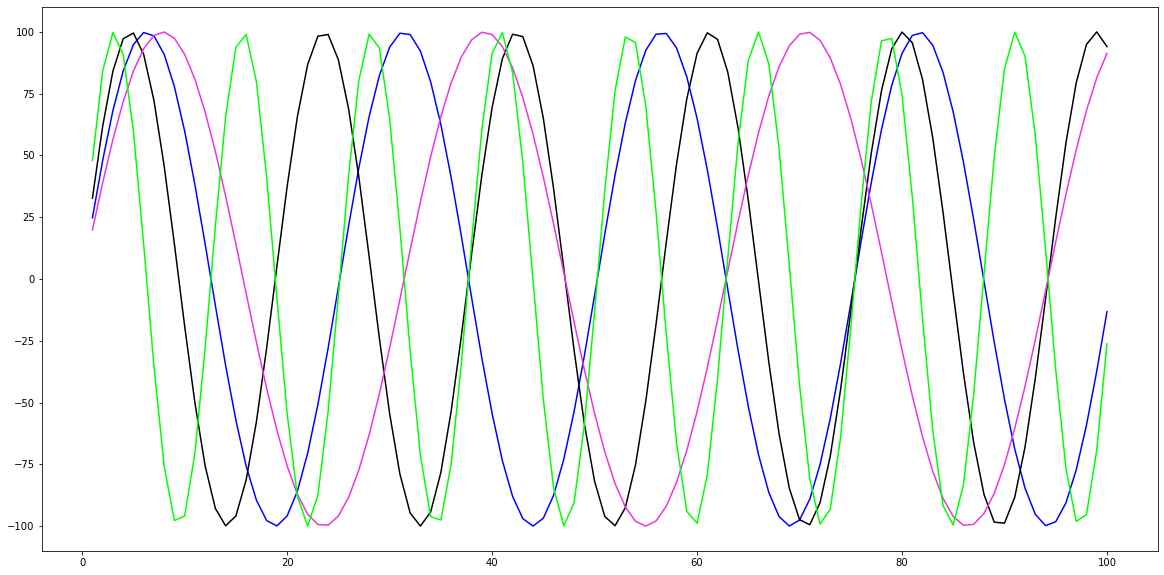

In [5]:
f = plt.figure(figsize=(20,10))
x = np.arange(1,101)
y1 = np.sin(x/4) * 100
y2 = np.sin(x/3) * 100
y3 = np.sin(x/5) * 100
y4 = np.sin(x/2) * 100

line1 = plt.plot(x,y1, color='b') # color abbreviation
line2 = plt.plot(x,y2, color='black') # color name
line3 = plt.plot(x,y3, color='#eb34db') # hex (HTML) specification
line4 = plt.plot(x,y4, color=(0,1,0)) # RGB or RGBA tuples from 0-1

## Wait... What's RGBA?

You can optionally specify a fourth color value called `alpha`, which sets the transparency of the thing being plotted. An alpha value of 1 is fully opaque, and an alpha value of 0 is completely transparent.

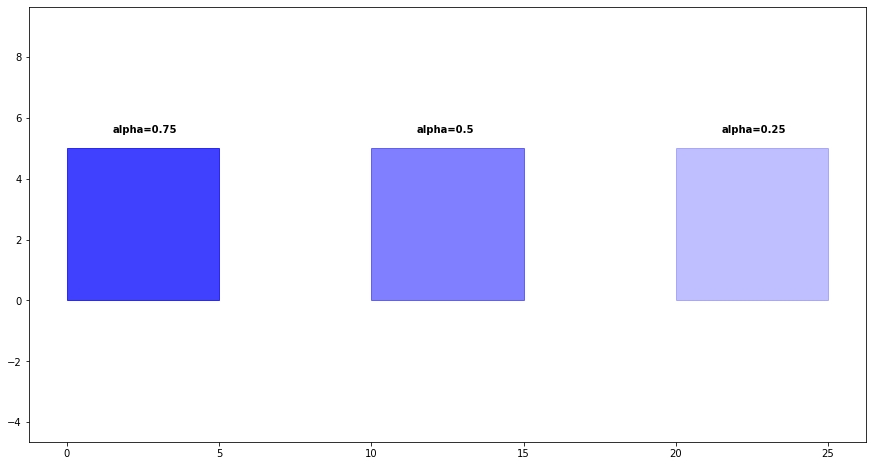

In [6]:
x1 = [0,5,5,0]
y1 = [0,0,5,5]

x2 = [10,15,15,10]
y2 = [0,0,5,5]

x3 = [20,25,25,20]
y3 = [0,0,5,5]
fig = plt.figure(figsize=(15,8))
f1 = plt.fill(x1,y1,color='blue', alpha=0.75)
f2 = plt.fill(x2,y2,color='blue', alpha=0.50)
f3 = plt.fill(x3,y3,color='blue', alpha=0.25)
t1 = plt.text(1.5,5.5,'alpha=0.75', fontweight='bold')
t2 = plt.text(11.5,5.5,'alpha=0.5', fontweight='bold')
t3 = plt.text(21.5,5.5,'alpha=0.25', fontweight='bold')
plt.axis('equal');

# Different Types of Plots

## Read in Data

Let's use pandas (subject of a future tutorial) to read in 4 days of US earthquake data obtained from ComCat.

In [7]:
# Read in the data, using the first row as columns, parse the "time" and "updated" columns as DateTime objects.
data = pd.read_csv('eq_query.csv', header=0, parse_dates=['time', 'updated'])

# How many earthquakes are in this data set?
print(f'{len(data)} events read.')

# Display the first five events
data.head()

1289 events read.


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2014-01-04 23:55:38.630000+00:00,34.305667,-116.447333,9.467,1.22,ml,34.0,145.0,0.114000,0.1200,...,2016-03-11 07:41:20.851000+00:00,"21km N of Yucca Valley, CA",earthquake,0.32,0.86,0.089,16.0,reviewed,ci,ci
1,2014-01-04 23:52:12.033000+00:00,36.728500,-116.311100,6.800,-0.30,ml,9.0,123.4,0.079000,0.0713,...,2018-06-29 22:59:53.785000+00:00,"44 km ESE of Beatty, Nevada",earthquake,NaN,2.60,0.000,1.0,reviewed,nn,nn
2,2014-01-04 23:49:32.380000+00:00,38.812833,-122.795333,1.100,1.39,md,42.0,63.0,0.004505,0.0400,...,2017-02-02 19:52:25.584000+00:00,"6 km W of Cobb, California",earthquake,0.09,0.17,0.099,12.0,reviewed,nc,nc
3,2014-01-04 23:36:08.930000+00:00,37.603500,-118.431500,6.816,1.16,md,26.0,71.0,0.056760,0.0700,...,2018-06-29 22:59:54.512000+00:00,"21 km ENE of Swall Meadows, California",earthquake,0.25,0.53,0.178,24.0,reviewed,nc,nc
4,2014-01-04 23:33:32+00:00,36.129000,-97.322000,5.000,3.70,mb_lg,NaN,NaN,NaN,0.6300,...,2020-03-19 22:24:57.499000+00:00,"5 km ESE of Orlando, Oklahoma",earthquake,NaN,2.00,0.059,83.0,reviewed,tul,us


## Histogram of Magnitudes

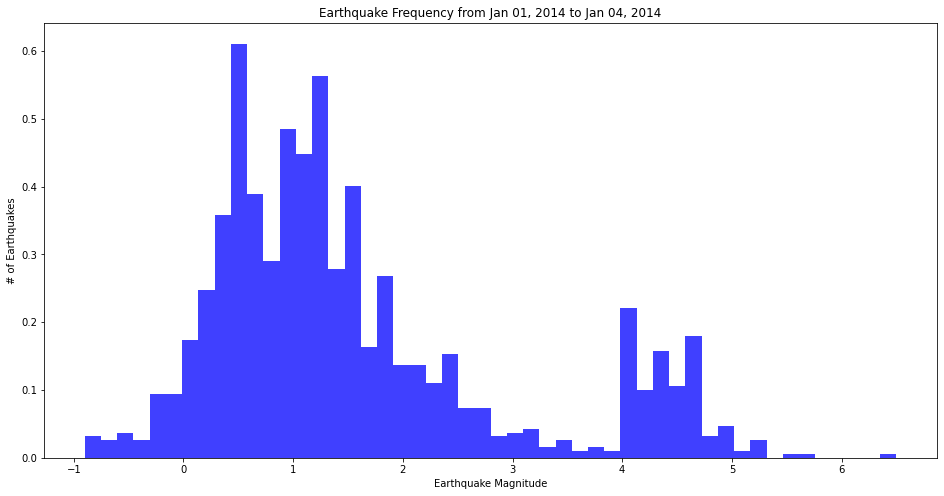

In [8]:
fig = plt.figure(figsize=(16,8))
n, bins, patches = plt.hist(data['mag'], 50, density=True, facecolor='b', alpha=0.75)
xlabel = plt.xlabel('Earthquake Magnitude')
ylabel = plt.ylabel('# of Earthquakes')
start_date = data['time'].min()
end_date = data['time'].max()
start_str = start_date.strftime('%b %d, %Y')
end_str = end_date.strftime('%b %d, %Y')
title_string = f'Earthquake Frequency from {start_str} to {end_str}'
title = plt.title(title_string)

## Magnitude Error Bars

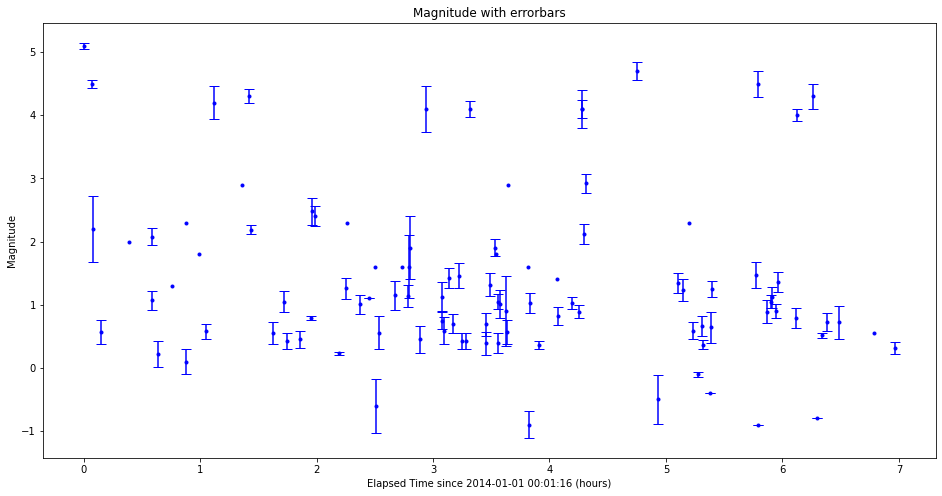

In [9]:
data = data.sort_values('time')
data_short = data.iloc[0:100].copy()
data_short['elapsed'] = data_short['time'] - data_short['time'].min()
data_short['elapsed'] = data_short['elapsed'] / np.timedelta64(3600, 's')
fig = plt.figure(figsize=(16,8))
error = plt.errorbar(data_short['elapsed'], data_short['mag'], yerr=data_short['magError'], capsize=5, fmt='b.')
timestr = data_short['time'].min().strftime('%Y-%m-%d %H:%M:%S')
xlabel = plt.xlabel(f'Elapsed Time since {timestr} (hours)')
ylabel = plt.ylabel('Magnitude')
title = plt.title('Magnitude with errorbars')

## Filled Polygons

In [10]:
# TODO!

## Data as an Image

We can plot gridded or raster data in matplotlib using `plt.imshow()`. Let's first load in the 2014 10% probability of exceedance for 1 second spectral acceleration from the National Seismic Hazard Map. We'll determine the number of rows and columns by counting number of unique latitudes and longitudes. By inspecting the data, we can determine that the resolution of the data in X and Y is 0.05 degrees. Finally, we'll get the min/max values of the data for use later on.

In [11]:
grid = np.loadtxt('2014_1hz10pct50yrs.dat')
nrows = len(np.unique(grid[:,1])) # number of unique latitudes
ncols = len(np.unique(grid[:,0])) # number of unique longitudes
prob = np.reshape(grid[:,2],(nrows, ncols))
# from inspection of the data...
dx = 0.05
dy = 0.05
xmin = grid[:,0].min()
ymax = grid[:,1].max()
xmax = grid[:,0].max()
ymin = grid[:,1].min()

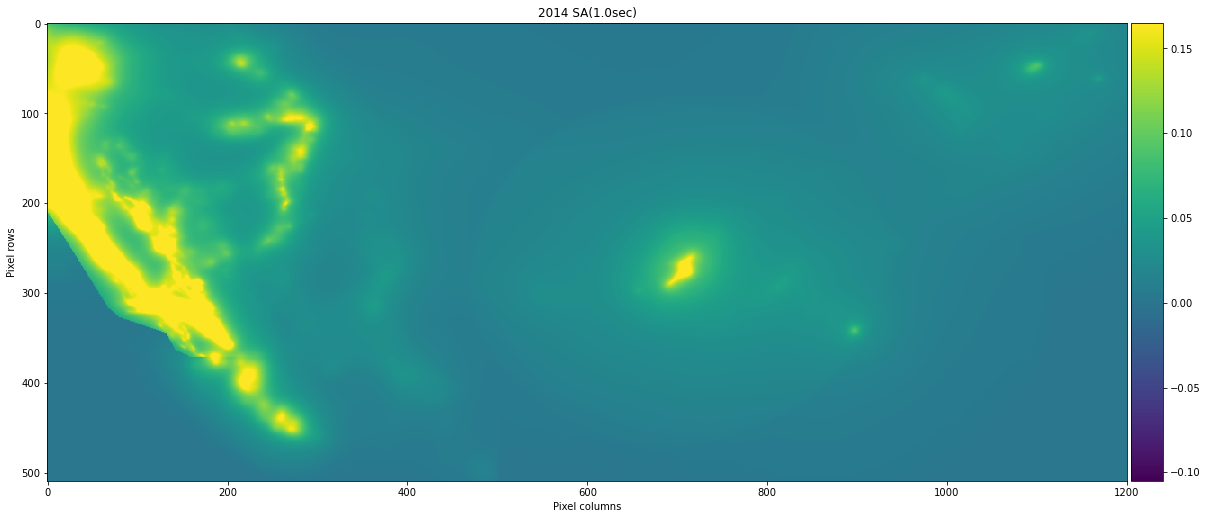

In [12]:
figwidth = 20
figheight= nrows/ncols * figwidth
fig = plt.figure(figsize=(figwidth,figheight))
ax = plt.gca()
# let's reset the dynamic range of the data so we can see more of the variation in the Midwest.
dmean = prob.mean()
dstd = prob.std()
dmin = dmean - dstd*3
dmax = dmean + dstd*3
img = plt.imshow(prob, vmin=dmin, vmax=dmax, interpolation='none')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar = plt.colorbar(img, cax=cax)

plt.sca(ax)
tstring = plt.title('2014 SA(1.0sec)')
xlabel = plt.xlabel('Pixel columns')
ylabel = plt.ylabel('Pixel rows')

## ColorMaps

There are many colormaps provided by matplotlib - the default one above is `viridis`. This is a good choice because it has a number of desirable properties:
 - Colorful
 - Pretty
 - Sequential
 - Perceptually uniform (even in black and white)
 - Accessible to colorblind viewers
 
 In case you DON'T think this is pretty, you have many other choices. (You can also make your own).
 
 
 *Note: You can reverse any colormap by appending "_r" to the name*

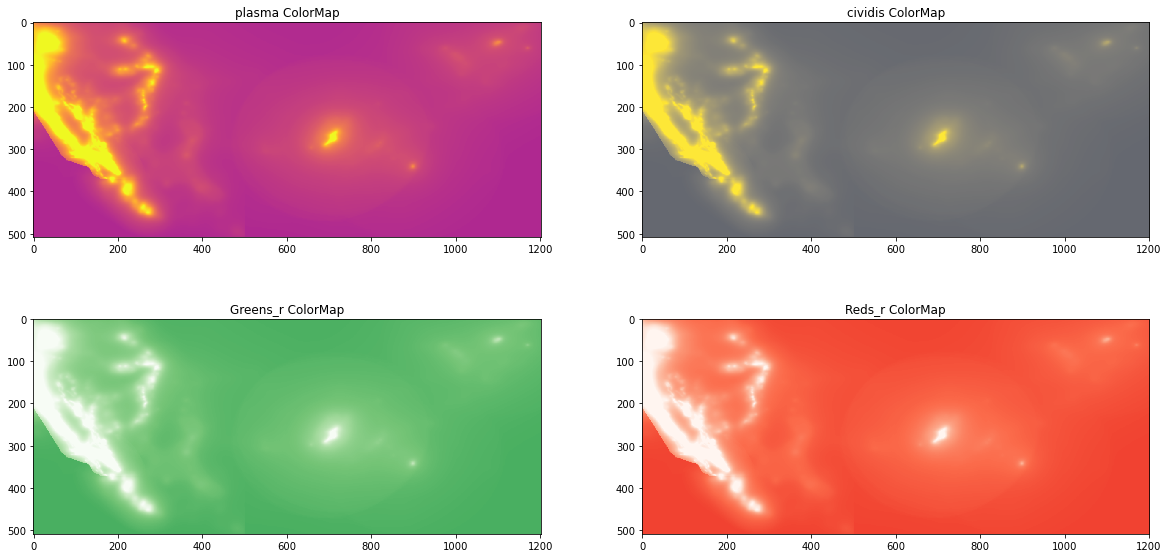

In [13]:
figwidth = 20
figheight= 10
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(figwidth,figheight))
colormaps = [['plasma', 'cividis'], ['Greens_r', 'Reds_r']]
# let's reset the dynamic range of the data so we can see more of the variation in the Midwest.
dmean = prob.mean()
dstd = prob.std()
dmin = dmean - dstd*3
dmax = dmean + dstd*3
for irow in range(0,len(colormaps)):
    crow = colormaps[irow]
    for icol in range(0,len(crow)):
        ax = axes[irow][icol]
        cmap = colormaps[irow][icol]
        plt.sca(ax)
        img = plt.imshow(prob, vmin=dmin, vmax=dmax, interpolation='none', cmap=cmap)
        tstring = plt.title(f'{cmap} ColorMap')

# Making Maps with Cartopy

Cartopy is a mapping library based on matplotlib, which supports all of the same features, but adds the ability to draw projected data and make nice looking maps.

A GeoAxes is a subclass of the matplotlib Axes class, which has a *projection*. If you add data to this GeoAxes by using one of the standard matplotlib plotting commands (plot(), scatter(), imshow(), etc.) then you must also supply a *transform* keyword to that function telling the GeoAxes what projection the data you are plotting is in.

Note that *PlateCarree* is the projection we use to denote latitudes and longitudes (no projection).

## Scatter Plot

C:\Users\mhearne\Miniconda3\envs\plotting_tutorial\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


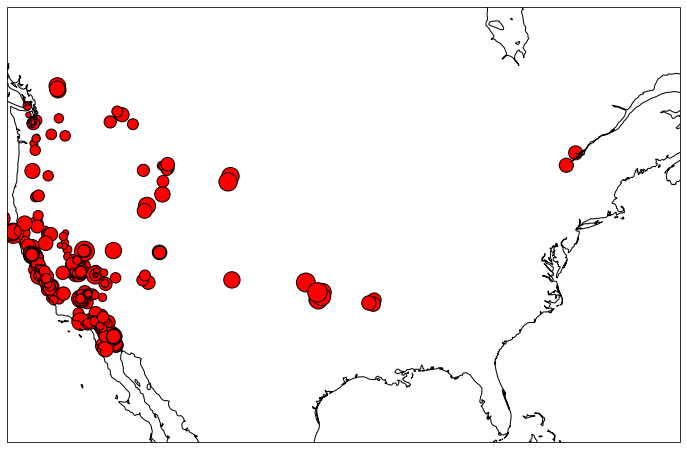

In [14]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

# ax.stock_img()
ax.coastlines()

# set extent to just the US
# ymin, ymax = [24.6, 50] # Latitude
# xmin, xmax = [-125, -65] # Longitude
ax.set_extent((xmin, xmax, ymin, ymax))

m = 99
b = 10
sizes = m*data['mag'] + b

points = plt.scatter(x=data['longitude'], y=data['latitude'],
            s=sizes,
            c="red",
            edgecolor='k',
            transform=ccrs.PlateCarree()) ## Important

## Image (Bonus Subplot!)

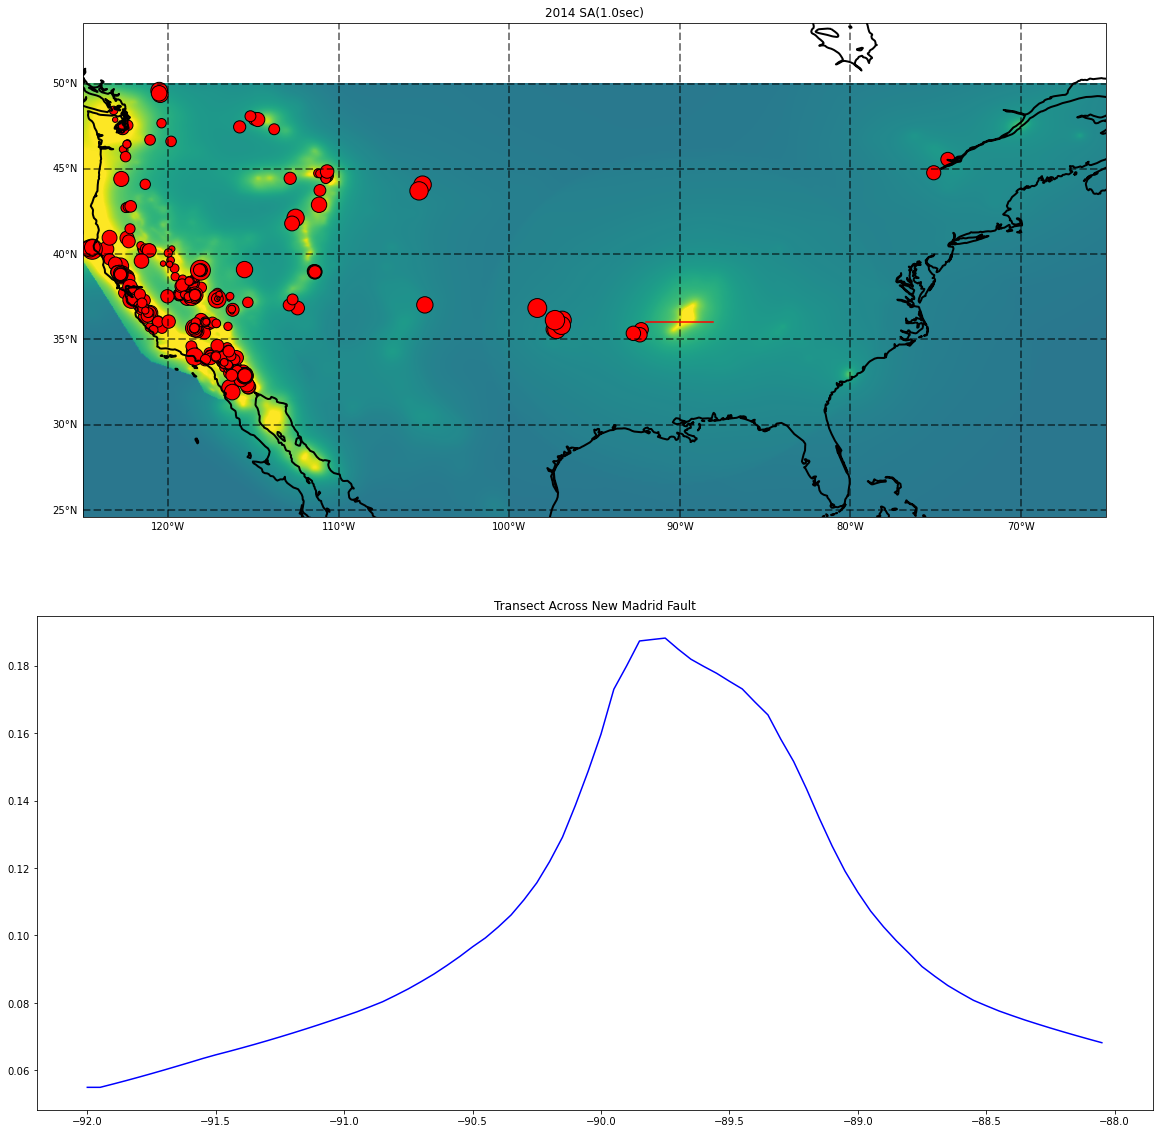

In [23]:
warnings.filterwarnings("ignore")
    
figwidth = 20
figheight= nrows/ncols * figwidth
figheight = 20
# use cartopy to draw this data on a map
# image extent is xmin, xmax, ymin, ymax
img_extent = (xmin, xmax, ymin, ymax)
fig = plt.figure(figsize=(figwidth, figheight))
geoaxes = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
# geoaxes.stock_img()
img = geoaxes.imshow(prob, vmin=dmin, vmax=dmax, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
geoaxes.coastlines(color='black', lw=2)
title = plt.title('2014 SA(1.0sec)')

# draw gridlines on the plot
gl = geoaxes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

m = 99
b = 10
sizes = m*data['mag'] + b

points = plt.scatter(x=data['longitude'], y=data['latitude'],
            s=sizes,
            c="red",
            edgecolor='k',
            transform=ccrs.PlateCarree()) ## Important

# draw sampling line across peak in the midwest
lat = 36.0
lon_start = -88
lons = np.arange(-92, -88, 0.05)
lats = [lat] * len(lons)
geoaxes.plot(lons, lats, 'r', transform=ccrs.PlateCarree())

geoaxes.set_extent((xmin, xmax, ymin, ymax))

# convert those lat/lon values to row/col
cols = [int(c) for c in (lons - xmin) / dx]
row = int((ymax - lat) / dy)

pdata = prob[row, cols]

# draw a second plot with the sampled probability on the y axis
pltaxes = plt.subplot(2, 1, 2)
line2d = pltaxes.plot(lons, pdata, 'b')
tstring = plt.title('Transect Across New Madrid Fault')

# Resources

 - Matplotlib pyplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
 - Matplotlib colormaps: https://matplotlib.org/stable/gallery/color/colormap_reference.html
 - Cartopy Tutorial: https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map#6